In [1]:
import os

import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
DATA_DIR = "data/counts/matrices/"

In [3]:
mutations_6 = pd.read_csv(
    os.path.join(DATA_DIR, "sigmatrix_6.csv"),
    index_col=0
)
mutations_96 = pd.read_csv(
    os.path.join(DATA_DIR, "sigmatrix_96.csv"),
    index_col=0
)

In [4]:
mutations_6.shape, mutations_96.shape

((6, 569), (96, 569))

In [5]:
mutations_6

,DO217786,DO217787,DO217788,DO217800,DO217826,DO217844,DO217865,DO217887,DO217907,DO217908,...,DO225389,DO225390,DO225391,DO225392,DO225393,DO225394,DO225395,DO225396,DO225397,DO225398
MutationType,,,,,,,,,,,,,,,,,,,,,
C>A,3397,2335,2933,616,2017,14466,2060,1427,6717,1485,...,1853,4959,8549,4598,1052,979,3849,1604,1409,3451
C>G,1693,1803,1344,397,1325,68910,1774,1275,3329,3681,...,3411,7949,28153,17916,783,721,6438,1681,1155,3751
C>T,6647,7036,7678,2433,7414,123751,5400,4074,14116,10180,...,5899,7400,39184,23142,2973,2435,13179,5365,3602,4105
T>A,1547,1592,1709,529,1334,1494,1541,676,3499,869,...,1266,3355,1031,1340,582,717,3722,1085,1499,2241
T>C,3297,2889,3726,825,2245,2293,2694,1277,4912,2000,...,2000,5171,1497,2172,983,973,6732,1742,2005,2980
T>G,1410,1016,1559,251,1295,1127,936,733,1869,900,...,940,3011,512,1221,376,368,28906,597,752,1774


In [6]:
mutations_96

,DO217786,DO217787,DO217788,DO217800,DO217826,DO217844,DO217865,DO217887,DO217907,DO217908,...,DO225389,DO225390,DO225391,DO225392,DO225393,DO225394,DO225395,DO225396,DO225397,DO225398
MutationType,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,379,241,194,47,202,298,373,135,396,184,...,133,466,264,187,81,60,316,159,117,304
A[C>A]C,249,140,291,61,181,146,239,156,548,158,...,131,371,74,163,103,85,329,122,100,327
A[C>A]G,60,73,68,32,57,135,47,30,75,14,...,24,84,38,23,53,5,55,11,16,35
A[C>A]T,249,175,242,19,123,139,109,55,301,83,...,137,339,102,177,34,47,220,117,154,294
A[C>G]A,97,117,128,30,52,324,118,42,258,73,...,184,495,230,159,42,59,364,106,61,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,360,196,262,64,189,184,166,128,664,73,...,156,320,63,232,44,104,502,122,140,206
T[T>G]A,96,58,92,14,28,62,52,52,190,42,...,113,193,39,115,28,50,341,46,76,97
T[T>G]C,83,77,79,8,39,42,31,13,72,145,...,43,150,30,33,23,8,451,21,17,62


<Axes: xlabel='MutationType', ylabel='DO217786'>

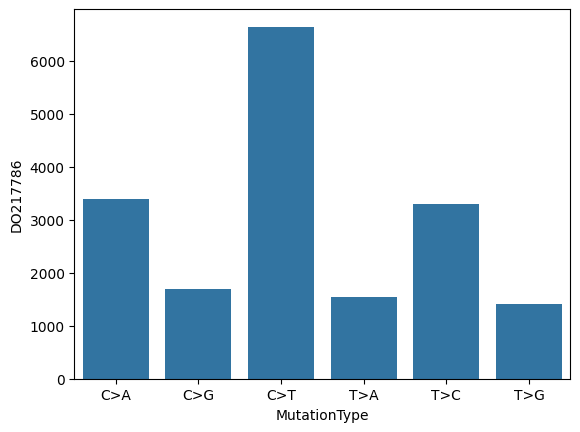

In [7]:
sns.barplot(
    mutations_6.iloc[:,0]
)

<Axes: xlabel='MutationType', ylabel='DO217786'>

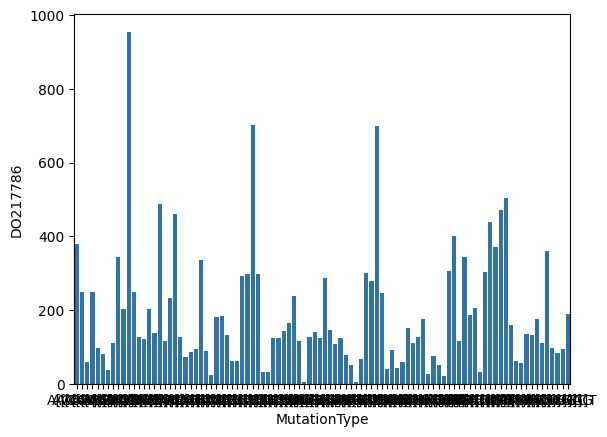

In [8]:
sns.barplot(
    mutations_96.iloc[:,0]
)

### Very simple out-of-the-box baselines: NMF & LDA

In [9]:
N_CATEGORIES, N_PATIENTS = mutations_96.shape

In [10]:
# NMF with Frobenius norm
nmf = NMF(
    n_components=40,
    random_state=2137,
    init="nndsvda",
    solver="mu",
    beta_loss="frobenius",
    verbose=1,
    max_iter=10_000
)
E_nmf = nmf.fit_transform(mutations_96.transpose())

Epoch 10 reached after 0.015 seconds, error: 29403.454087
Epoch 20 reached after 0.035 seconds, error: 18094.567202


In [11]:
E_nmf.shape

(569, 40)

In [12]:
nmf.components_.shape

(40, 96)

<Axes: >

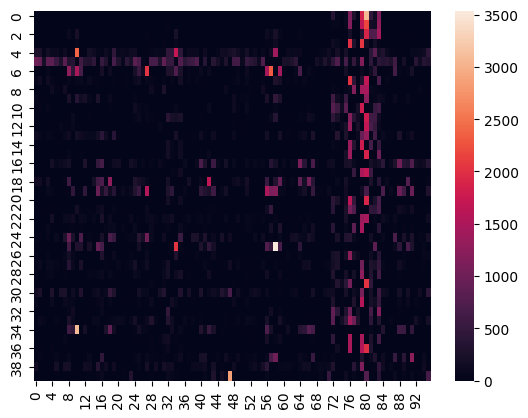

In [13]:
sns.heatmap(nmf.components_.round(2))

In [14]:
# LDA
lda = LatentDirichletAllocation(
    n_components=40,
    max_iter=100,
    learning_method="batch",
    learning_offset=10.0,
    perp_tol=1e-2,
    random_state=2137,
    n_jobs=-1,
    evaluate_every=10,
    verbose=1
)
E_lda = lda.fit_transform(mutations_96.transpose())

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 48.3335
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 48.1781
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100, perplexity: 48.1121
iteration: 31 of

In [15]:
E_lda.shape

(569, 40)

In [16]:
lda.components_.shape

(40, 96)

In [17]:
E_nmf.mean(), E_lda.mean(), np.abs((E_nmf - E_lda)).mean(), (E_nmf - E_lda).max()

(0.054413416392687125, 0.025, 0.06441750648215132, 15.922147393694834)

<Axes: >

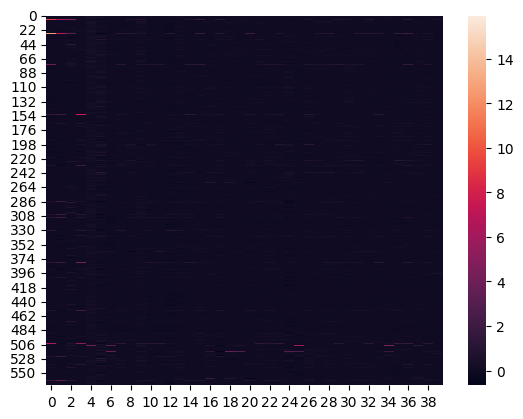

In [18]:
sns.heatmap(E_nmf - E_lda)

<Axes: >

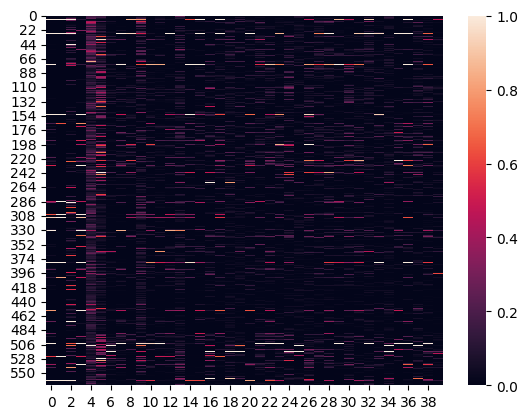

In [19]:
sns.heatmap((E_nmf - E_lda).clip(0, 1))

In [24]:
(E_lda @ lda.components_).shape, mutations_96.transpose().shape

((569, 96), (569, 96))